## Quora Insincere Kaggle Competition 
### Exploratory Data Analysis - version 1 - mjy

In [1]:
# Keras Imports
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# Numpy
import numpy
numpy.random.seed(1331)
# Pandas
import pandas as pd
# Sklearn
from sklearn.model_selection import train_test_split
# Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
# NLP
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

Using TensorFlow backend.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Matt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# load training data
q_df = pd.read_csv("C:\\Users\\Matt\\Desktop\\Kaggle\\Quora_Insincere\\train.csv")

In [4]:
# view data
q_df.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [5]:
# view the first question (in full)
q_df.loc[1,["question_text"]][0]

'Do you have an adopted dog, how would you encourage people to adopt and not shop?'

In [6]:
# show the top 10 most popular words
q_df.question_text.str.split(expand=True).stack().value_counts()[:10]

the     653948
What    417802
to      403183
a       402682
in      363131
is      331647
of      330825
I       306261
How     261930
and     251973
dtype: int64

In [16]:
# show the top 10 most popular words, excluding stop words
word_list = q_df.question_text.str.split(expand=True).stack()
filtered_list = word_list[~word_list.isin(stopwords.words('english'))]
filtered_list.value_counts()[:20]

What      417802
I         306261
How       261930
Why       142291
Is        108887
get        61731
best       61413
Can        52698
would      51374
people     48317
Which      47303
like       42848
Do         40041
good       35886
If         34557
one        29496
Are        29201
make       27533
think      25357
many       23996
dtype: int64

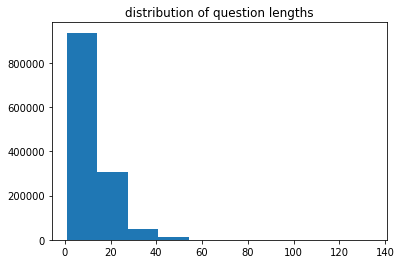

In [14]:
# distribution of question lengths
plt.hist(q_df['question_text'].str.split().str.len())
plt.title("distribution of question lengths")
plt.show()

In [15]:
# longest question
print("Longest question length:", numpy.max(q_df['question_text'].str.split().str.len()))
print("Shortest question length:", numpy.min(q_df['question_text'].str.split().str.len()))
print("Average question length:", numpy.mean(q_df['question_text'].str.split().str.len()))

Longest question length: 134
Shortest question length: 1
Average question length: 12.803609463740754


In [21]:
print("Total rows: {:,}".format(q_df.size))

Total rows: 3,918,366


In [32]:
# Target Stats
print("Total 1's: {:,}".format(numpy.sum(q_df['target'])))
print("Total 0's: {:,}".format(3918366-numpy.sum(q_df['target'])))
print("Pct. of 1's: {0:.2%}".format(numpy.mean(q_df['target'])))

Total 1's: 80,810
Total 0's: 3,837,556
Pct. of 1's: 6.19%
